# Exercícios

In [2]:
# Importe o modulo pyplot de Matplotlib como plt
import matplotlib.pyplot as plt

# Importe pandas com a abreviacao 'pd'
import pandas as pd

# Importe NumPy com a abreviacao 'np'
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Exercício-001

Importe o conjunto de dados diretamento do github em um _DataFrame_ - https://raw.githubusercontent.com/CongLiu-CN/zero-to-mastery-ml/master/data/heart-disease.csv

In [3]:
url = 'https://raw.githubusercontent.com/CongLiu-CN/zero-to-mastery-ml/master/data/heart-disease.csv'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exercício-002

Crie duas variáveis, uma para armazenar a resposta de predição (coluna **target**) e outra com todas as outras variáveis, exceto **target**, que serão utilizadas como variáveis explicativas.

In [4]:
y = df['target']
X = df.drop(columns = 'target')

### Exercício-003

Use o método `train_test_split` dentro do módulo `model_selection` da biblioteca `sklearn` e divida os dados em conjuntos de treinamento e teste.

In [5]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y)
print(X_treinamento.shape)
print(X_teste.shape)
print(y_treinamento.shape)
print(y_teste.shape)

(227, 13)
(76, 13)
(227,)
(76,)


### Exercício-004
Importe o classificador [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) da biblioteca `sklearn` e criem uma variável com uma instância do classificador. _Dica_: veja o manual do classificador.


In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

### Exercício-004

Ajuste um modelo de classificação com os dados de treinamento.

In [7]:
rf.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

### Exercício-005

Execute a predição da variável reposta com o conjunto de teste de variáveis explicativas.

In [8]:
y_predicao = rf.predict(X_teste)

### Exercício-006

Avalie as predições do modelo no conjunto de treinamento e no conjunto de testes.

In [9]:
from sklearn import metrics

rf.score(X_teste, y_teste)

0.7763157894736842

### Exercício-007

Repita as etapas executas acima para os modelos de classificação listados abaixo e compare os resultados.

* [LinearSVC](https://scikit-learn.org/stable/modules/svm.html#classification)
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/neighbors.html)
* [SVM](https://scikit-learn.org/stable/modules/svm.html#classification)
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [10]:
# Linear Support Vector

from sklearn import svm
linear_svc = svm.LinearSVC()
linear_svc.fit(X_treinamento, y_treinamento)
print(f'Score for Linear Support Vector: {linear_svc.score(X_teste, y_teste)}')

# Nearest Neighbors

from sklearn import neighbors
nearest_neighbors_classifier = neighbors.KNeighborsClassifier()
nearest_neighbors_classifier.fit(X_treinamento, y_treinamento)
print(f'Score for Nearest Neighbors: {nearest_neighbors_classifier.score(X_teste, y_teste)}')

# Support Vector Machines

from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_treinamento, y_treinamento)
print(f'Score for Support Vector Machines: {svm_classifier.score(X_teste, y_teste)}')

# Logistic Regression
from sklearn import linear_model

logistic_regression_classifier = linear_model.LogisticRegression(max_iter=1000) 
logistic_regression_classifier.fit(X_treinamento, y_treinamento)
print(f'Score for Logistic Regression: {logistic_regression_classifier.score(X_teste, y_teste)}')

Score for Linear Support Vector: 0.7763157894736842
Score for Nearest Neighbors: 0.6447368421052632
Score for Support Vector Machines: 0.618421052631579
Score for Logistic Regression: 0.7763157894736842


### Exercício-008

Crie um _DataFrame_ com os resultados do exercício anterior e faça um gráfico de barras a partir do _DataFrame_.

,Model,Score
0,linear_support_vector,0.776316
1,nearest_neighbors,0.644737
2,support_vector_machines,0.618421
3,logistic_regression,0.776316


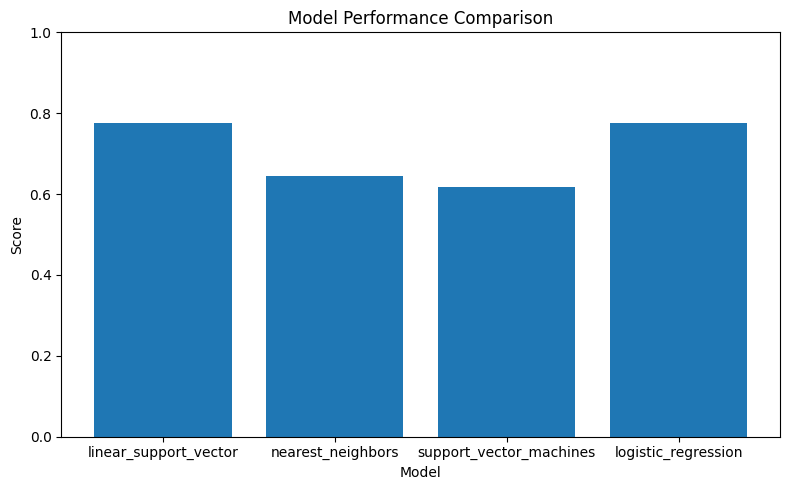

In [11]:
linearSVC_score = linear_svc.score(X_teste, y_teste)
nearest_neighbors_score = nearest_neighbors_classifier.score(X_teste, y_teste)
SVM_score = svm_classifier.score(X_teste, y_teste)
logistic_regression_score = logistic_regression_classifier.score(X_teste, y_teste)

resultados = pd.DataFrame(
    columns = ['Model', 'Score'],
    data = [['linear_support_vector', linearSVC_score], ['nearest_neighbors', nearest_neighbors_score], ['support_vector_machines', SVM_score], ['logistic_regression', logistic_regression_score]]
    
)

display(resultados)

plt.figure(figsize=(8, 5))
plt.bar(resultados['Model'], resultados['Score'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Model')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

### Exercício-009

Utilize o modelo `LogisticRegression` para selecionar parâmetros do modelo que podem ser alterados para testar o desempenho do modelo. [Exemplo](https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/).

Pode se usar [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) ou [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Utilize o conjunto de treinamento das etapas anteriores.


In [23]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(estimator= logistic_regression_classifier, param_grid= parameters)
grid_search.fit(X_treinamento, y_treinamento)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

### Exercício-010

Mostre os melhores parâmetros encontrados na comparação, e o calcule a acurácia da predição com o modelo para estes parâmetros no conjunto de teste.

In [52]:
print(f'Melhores parâmetros: {grid_search.best_params_}')
print(f'Melhor score: {grid_search.best_score_}')
print(f'Melhor modelo: {grid_search.best_estimator_}')

logistic_regression_classifier = linear_model.LogisticRegression(C= 100, max_iter=100, solver='lbfgs', penalty='l2')
logistic_regression_classifier.fit(X_treinamento, y_treinamento)
logistic_regression_score = logistic_regression_classifier.score(X_teste, y_teste)

print(logistic_regression_score)

## Por que o score é menor quando uso os "melhores parâmetros" do que quando treino no default?
## ChatGPT disse que é por causa de 'overfitting'

Melhores parâmetros: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Melhor score: 0.8592270531400965
Melhor modelo: LogisticRegression(C=100)
0.7631578947368421


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Tentando com RandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(logistic_regression_classifier, parameters)
random_search.fit(X_treinamento, y_treinamento)

print(random_search.best_params_)

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'C': 100}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

### Exercício-011

Calcule a matriz de confusão para o modelo e obtenha as seguinte métricas (calculadas com a matriz de confusão e com métodos de `sklearn`):
Precisão, especificidade, sensibilidade, _score f1_ e Área Abaixo da Curva ROC, incluindo a curva;

Precisao: 0.8484848484848485
F1 score: 0.7567567567567568
Sensibilidade: 0.6829268292682927
Especificidade: 0.8571428571428571
Área abaixo da curva: 0.770034843205575


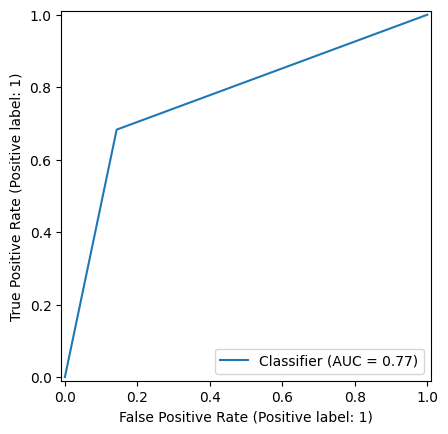

In [67]:
y_predicao = logistic_regression_classifier.predict(X_teste)

matriz_confusao = metrics.confusion_matrix(y_teste, y_predicao)
true_negatives, false_positives, false_negatives, true_positives = matriz_confusao.ravel() # obtido do help() do método metrics.confusion_matrix

precisao = metrics.precision_score(y_teste, y_predicao)
f1_score = metrics.f1_score(y_teste, y_predicao)
area_curva_roc = metrics.roc_auc_score(y_teste, y_predicao)
sensitivity = metrics.recall_score(y_teste, y_predicao)
specificity = true_negatives / (true_negatives + false_positives)

print(f'Precisao: {precisao}')
print(f'F1 score: {f1_score}')
print(f'Sensibilidade: {sensitivity}')
print(f'Especificidade: {specificity}')
print(f'Área abaixo da curva: {area_curva_roc}')

curva_roc = metrics.roc_curve(y_teste, y_predicao)

display = metrics.RocCurveDisplay.from_predictions(y_teste, y_predicao)

### Exercício-012

Execute e interprete a validação cruzada com o método `cross_val_score` do módulo `model_selection`.

In [72]:
from sklearn import model_selection
print(model_selection.cross_val_score(logistic_regression_classifier, X, y))

# A função estima a acurácia do método em classificar valores novos/desconhecidos. Divide o dataframe em vários subsets, treina o modelo em alguns e testa no restante.
# A função faz isso 'k' vezes, sendo o padrão k = 5
# O output é um nparray com o score em cada validação
# A consistência dos valores aponta que o modelo não tem performance reduzida em um subset de valores em relação a outro
# É possível utilizar esse resultado e calcular uma acurácia média

[0.81967213 0.86885246 0.83606557 0.88333333 0.71666667]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

### Exercício-013

[Exporte e importe](https://scikit-learn.org/stable/modules/model_persistence.html) um modelo treinado utilizando a biblioteca _joblib_. Obtenha a acurácia do modelo treinado nos dados de teste.

In [75]:
# Exportando o modelo treinado:

import joblib

joblib.dump(logistic_regression_classifier, 'logistic_regression_classifier.pkl')


['logistic_regression_classifier.pkl']

In [87]:
# Importando um modelo:
modelo = joblib.load('./logistic_regression_classifier.pkl')

# Realizando a previsao
y_predicao = modelo.predict(X_teste)

# Calculando a acurácia
acuracia = metrics.accuracy_score(y_predicao, y_teste)

print(f'Acurácia: {acuracia}')

Acurácia: 0.7631578947368421
